### Testando o desempenho dos modelos com as features numéricas e categóricas (após tratamento)

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

# ignorando warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os dados

df = pd.read_csv('../datasets/df_num_categ.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
x = df.drop(columns=['TARGET'])
y = df['TARGET']

#Separando treino, teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify = y, random_state = 42)

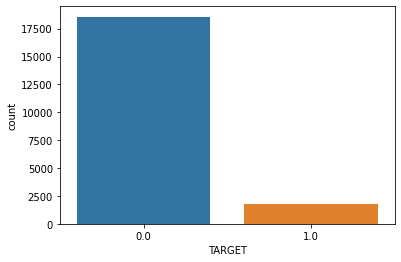

In [8]:
# Verificando a distribuição do target

sns.countplot(y_train);

#### 1. RandomForestClassifier

In [55]:
# Pipeline
model_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(random_state=42))
])

# Dicionário de parâmetros
params = {
    'model__n_estimators': np.random.randint(10,100,20),
    'model__max_depth': range(1,20)
}

# Configurando um objeto de validação cruzada
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Configurando o otimizador
search = RandomizedSearchCV(
    estimator=model_pipe,
    n_iter=20,
    cv=cvs,
    scoring='f1',
    refit=True,
    random_state=2,
    param_distributions=params,
    n_jobs=-1
)

# Ajustando o modelo
search.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': range(1, 20),
                                        'model__n_estimators': array([11, 33, 79, 66, 65, 37, 82, 76, 82, 16, 15, 25, 21, 30, 35, 39, 72,
       86, 54, 69])},
                   random_state=2, scoring='f1')

In [56]:
print('Melhores Parâmetros:')
print(search.best_params_)
print('Melhor Métrica Média:')
print(search.best_score_)

Melhores Parâmetros:
{'model__n_estimators': 15, 'model__max_depth': 14}
Melhor Métrica Média:
0.6069407876338557


In [70]:
# Realizando predições
yhat = search.best_estimator_.predict(x_test)

# Checando o desempenho do modelo
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      7959
         1.0       1.00      0.43      0.60       747

    accuracy                           0.95      8706
   macro avg       0.97      0.71      0.79      8706
weighted avg       0.95      0.95      0.94      8706



In [4]:
# Balanceando o dataset com uso do SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

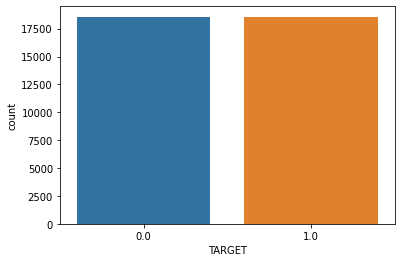

In [5]:
# Verificando a distribuição do target

sns.countplot(y_train);

#### 3. RandomForestClassifier com target balanceado (SMOTE)

In [72]:
# Pipeline
model_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(random_state=42))
])

# Dicionário de parâmetros
params = {
    'model__n_estimators': np.random.randint(10,100,20),
    'model__max_depth': range(1,20)
}

# Configurando um objeto de validação cruzada
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Configurando o otimizador
search = RandomizedSearchCV(
    estimator=model_pipe,
    n_iter=20,
    cv=cvs,
    scoring='f1',
    refit=True,
    random_state=2,
    param_distributions=params,
    n_jobs=-1
)

# Ajustando o modelo
search.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': range(1, 20),
                                        'model__n_estimators': array([97, 45, 59, 35, 46, 53, 30, 58, 21, 79, 68, 10, 55, 22, 98, 88, 27,
       46, 90, 96])},
                   random_state=2, scoring='f1')

In [73]:
print('Melhores Parâmetros:')
print(search.best_params_)
print('Melhor Métrica Média:')
print(search.best_score_)

Melhores Parâmetros:
{'model__n_estimators': 46, 'model__max_depth': 17}
Melhor Métrica Média:
0.944513517703394


In [74]:
# Realizando predições
yhat = search.best_estimator_.predict(x_test)

# Checando o desempenho do modelo
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      7959
         1.0       0.57      0.50      0.54       747

    accuracy                           0.93      8706
   macro avg       0.76      0.73      0.75      8706
weighted avg       0.92      0.93      0.92      8706



### Conclusão

Aparentemente incluir as features categóricas não melhorou o desempenho do modelo.

### Próximos passos

1. Tratar os outliers de outra maneira (demanda conhecimento do negócio) e avaliar novamente os modelos
2. Realizar o encoding das features categóricas de outra maneira (não utilizar o TargetEncoding)
3. Testar novas combinações de hyperparâmetros
4. Testar novos modelos